In [3]:
# %%
# Python standard library
import math
import random

# custom utils
from utils import display_maze
from examples.dense_maze_4x3 import maze


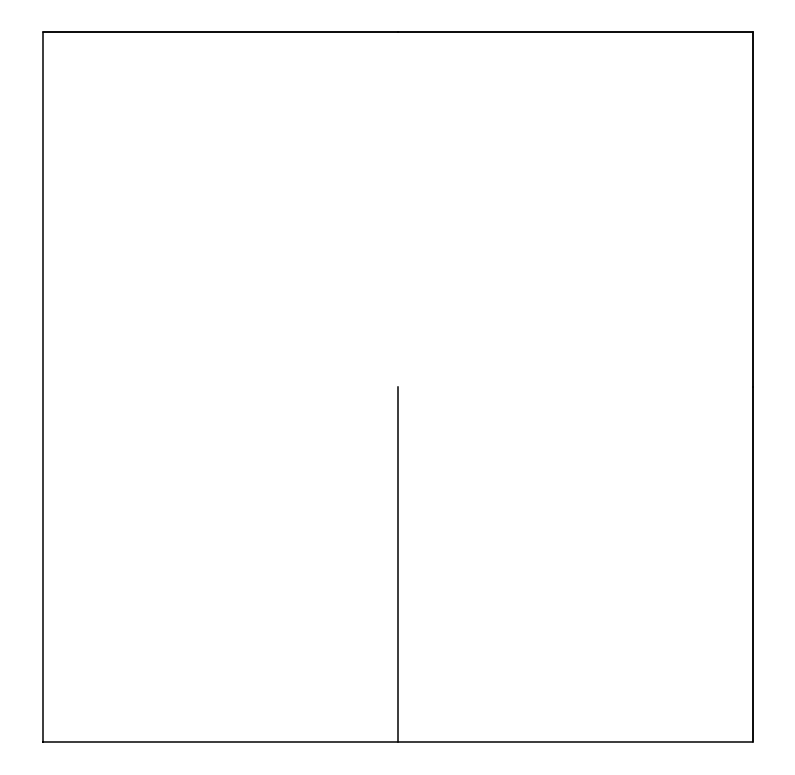

In [4]:
vertices = set([
    (0,0),
    (0,1),
    (1,0),
    (1,1),
])

edges= set([
    ((0,0),(0,1)),
    ((1,0),(0,0)),
    ((1,1),(1,0)),
    ((1,0),(1,1)),
    ((1,1),(0,1)),
    ((0,1),(1,1)),
])

weights= {
    ((0,0),(0,1)):1,
    ((0,1),(1,0)):1
}

display_maze((vertices, edges, weights))

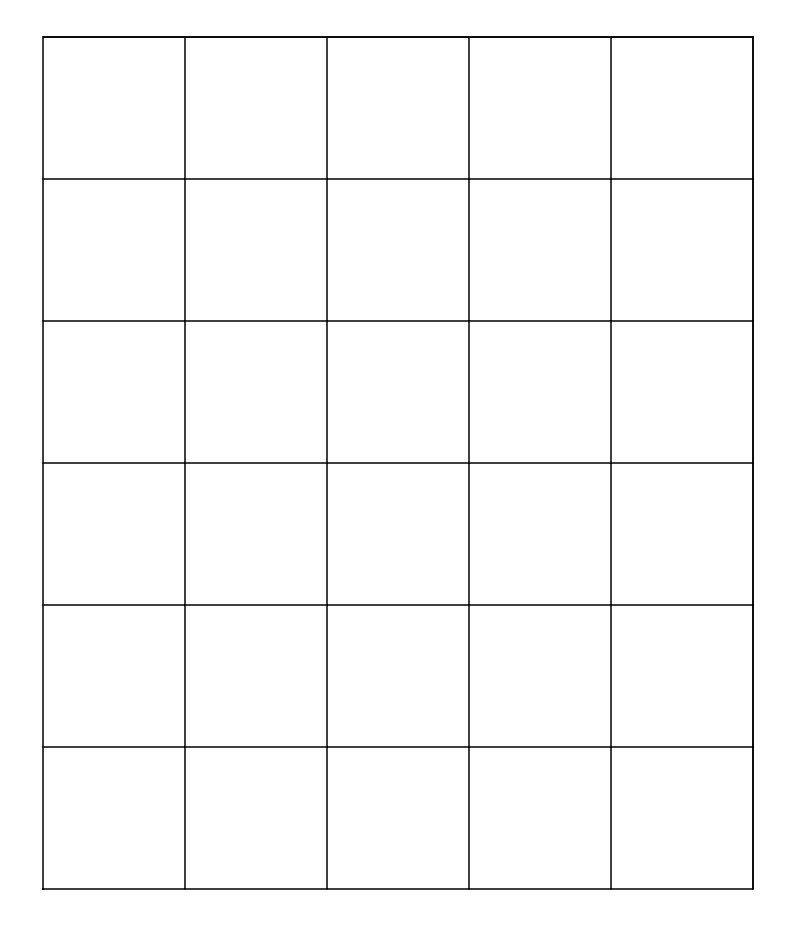

In [5]:
def full_maze(width,height):
    vertices=[]
    edges=[]
    weights={}
    
    for i in range(width):
        for j in range(height):
            vertices.append((i,j))

    display_maze((set(vertices), set(edges), weights))       


full_maze(5,6)     

            


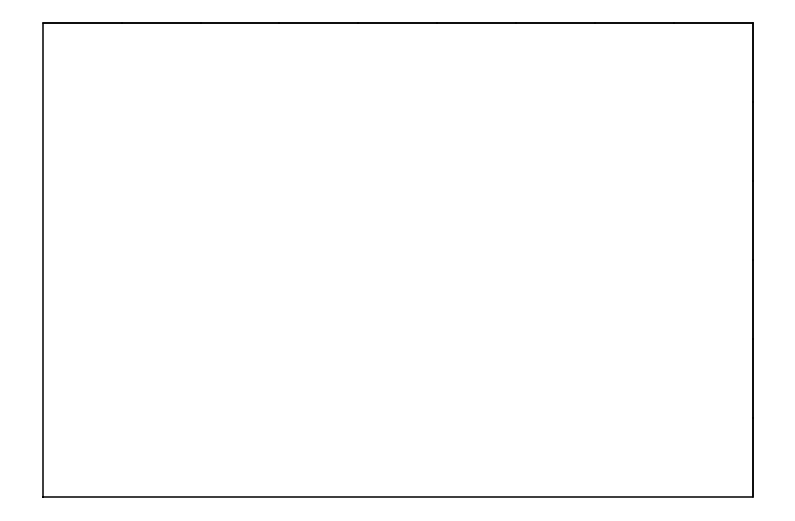

In [6]:
from itertools import product

def empty_mazes1(width,height):

    vertices=[]
    edges=[]
    weights={}

    for i in range(width):
        for j in range(height):
            vertices.append((i,j))

    edges=[(i,j) for i,j in product(vertices,vertices)]      

    display_maze((set(vertices),set(edges),weights))   

empty_mazes1(9,6)      
    
    

In [7]:
def empty_maze(width,height):
    vertices=set(product(range(width),range(height)))
    edges=set()

    edges_vert={((col,row),(col,row+1)) for col in range(width) for row in range(height-1)}
    edges_hor={((col,row),(col+1,row)) for col in range(width-1) for row in range(height)}
    edges= set()
    edges.update(edges_vert)
    edges.update(edges_hor)
    edges=edges_vert.union(edges_hor)
    weights={}

    return vertices, edges,weights

    

empty_maze(5,4)

({(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 1),
  (1, 2),
  (1, 3),
  (2, 0),
  (2, 1),
  (2, 2),
  (2, 3),
  (3, 0),
  (3, 1),
  (3, 2),
  (3, 3),
  (4, 0),
  (4, 1),
  (4, 2),
  (4, 3)},
 {((0, 0), (0, 1)),
  ((0, 0), (1, 0)),
  ((0, 1), (0, 2)),
  ((0, 1), (1, 1)),
  ((0, 2), (0, 3)),
  ((0, 2), (1, 2)),
  ((0, 3), (1, 3)),
  ((1, 0), (1, 1)),
  ((1, 0), (2, 0)),
  ((1, 1), (1, 2)),
  ((1, 1), (2, 1)),
  ((1, 2), (1, 3)),
  ((1, 2), (2, 2)),
  ((1, 3), (2, 3)),
  ((2, 0), (2, 1)),
  ((2, 0), (3, 0)),
  ((2, 1), (2, 2)),
  ((2, 1), (3, 1)),
  ((2, 2), (2, 3)),
  ((2, 2), (3, 2)),
  ((2, 3), (3, 3)),
  ((3, 0), (3, 1)),
  ((3, 0), (4, 0)),
  ((3, 1), (3, 2)),
  ((3, 1), (4, 1)),
  ((3, 2), (3, 3)),
  ((3, 2), (4, 2)),
  ((3, 3), (4, 3)),
  ((4, 0), (4, 1)),
  ((4, 1), (4, 2)),
  ((4, 2), (4, 3))},
 {})

In [8]:
from random import randint

def random_maze(width, height, starting_point=(0,0)):
    vertices={(col,row) for col in range(width) for row in range(height)}
    edges={}

    to_visit={starting_point}
    visited=set()

    while len(to_visit)>0:
        current= choice(list(to_visit))
        col,row= current
        neighbours={
            (col+dcol, row+drow)
            for dcol, drow in directions
            if(col+dcol,row+drow) in vertices
        }.intersection(vertices)
        new= choice(neighbours)
        edges.add((current,new))
        edges.add((new,current))

        to_visit.remove(current)
        visited.add(current)

        to_visit.add(new)

        break
    weight= {edge:1 for edge in edges}
    return vertices, edges, weight

display_maze(maze(4,4))



TypeError: 'tuple' object is not callable